In [32]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


## Loading/Choosing Features

In [ ]:
# loading the cleaned dataset

# Construct path
data_path = os.path.join("..", "data", "insurance_cleaned.csv")
df_cleaned = pd.read_csv(data_path)

df_cleaned.head()

In [ ]:
# Choosing the x and y features
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

### Train/Predict/Evaluate

In [29]:
# Model training and prediction

# Model training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model prediction
y_pred = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)



In [30]:
# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R^2 Score: 0.78
Mean Absolute Error: 4176.27
Root Mean Squared Error: 5793.66


#### Observation

The linear regression model did a pretty solid job. It got an R² of about **0.78**, which means it was able to explain most of the variation in medical charges. On average, the predictions were off by around **$4,176**, and the RMSE was a bit higher at **$5,794**, probably because of some bigger outliers in the data.

Overall, not bad for a first model! There's definitely room to improve though, especially by trying models that can handle non-linear stuff better, like Random Forest or something similar.


### Plotting Actual vs Predicted Medical Charges Of Linear Regression

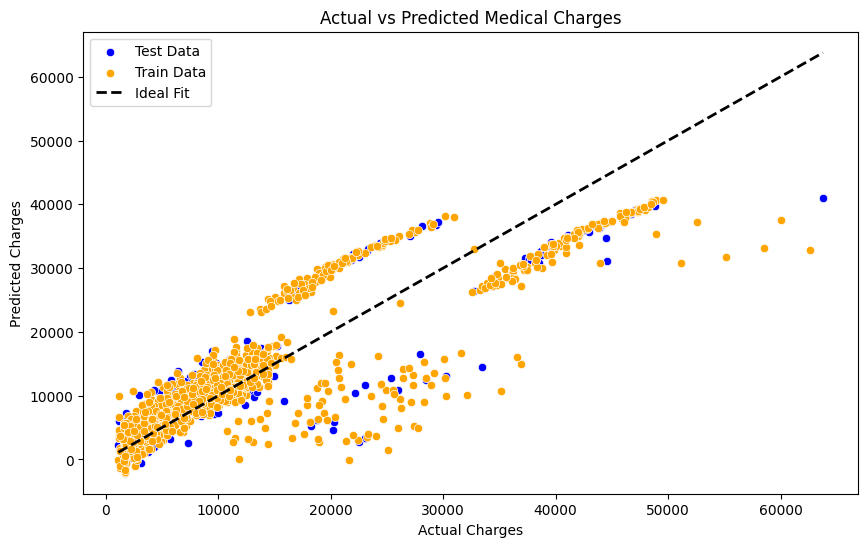

In [31]:
# plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Test Data')
sns.scatterplot(x=y_train, y=y_pred_train, color='orange', label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.legend()
plt.show()

#### Observation
This plot shows that the model is doing a solid job overall. Most predictions are close to the actual charges, especially in the mid-range. The train set fits really well, and the test set does a good job too, though it looks like the model tends to **underestimate** higher charges. That makes sense since linear regression doesn’t always capture complex patterns or outliers. This gives a good starting point, but trying a more flexible model like Random Forest might help catch those higher values better.


## Random Forest Model

### Train/Predict/Evaluate

In [34]:
# Training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_train_rf = rf_model.predict(X_train)


In [35]:
# Model evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R^2 Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")

R^2 Score: 0.86
Mean Absolute Error: 2718.83
Root Mean Squared Error: 4703.71
